# Importing the nessecary dependencies.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest
%matplotlib inline

In [3]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 10, 5
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [4]:
#def run_tests():
#  unittest.main(argv=[''], verbosity=1, exit=False)

In [5]:
df_train = pd.read_csv('train.csv')
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
#df_train['OverallQual']

In [7]:
#df_train.isnull().sum()

In [8]:
#for col in df_train.columns:
#    print(col)

# Data exploration

In [9]:
# check correlation
df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [10]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

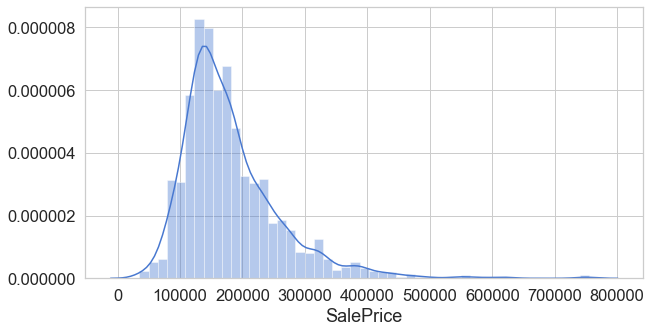

In [11]:
sns.distplot(df_train['SalePrice'])
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


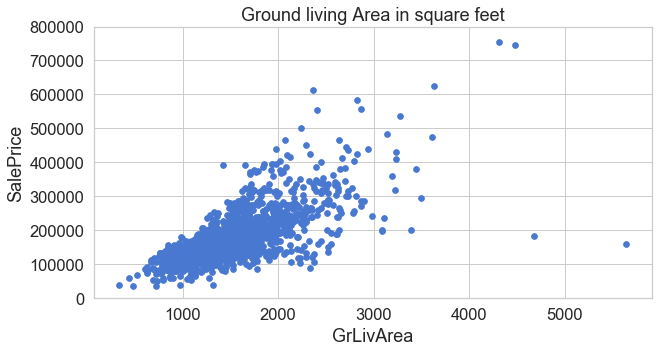

In [12]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), s=32,title = 'Ground living Area in square feet');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


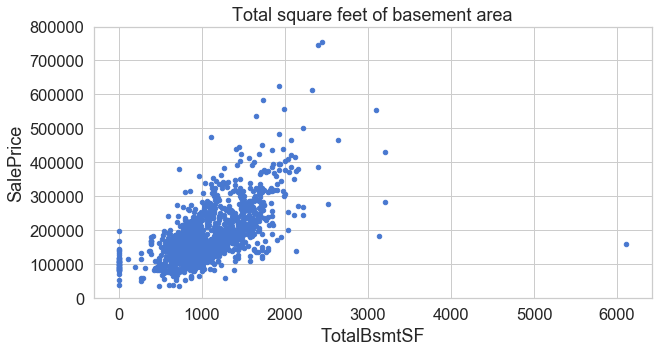

In [13]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), title='Total square feet of basement area');

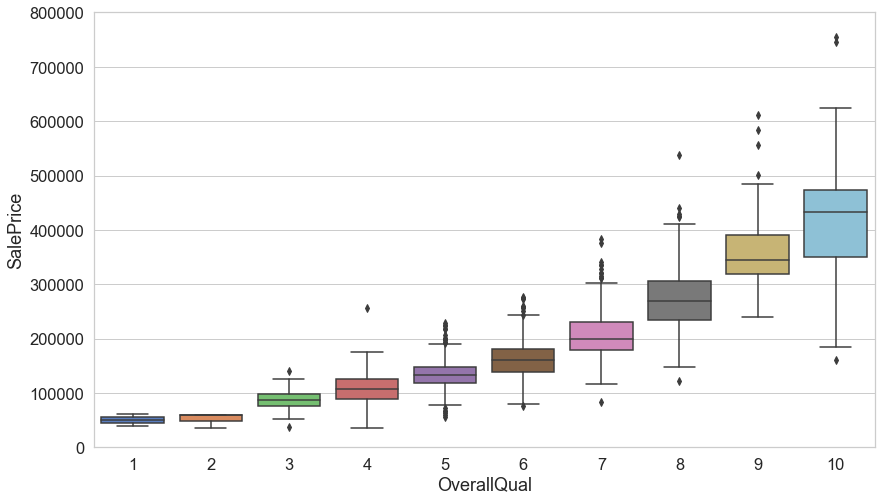

In [14]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


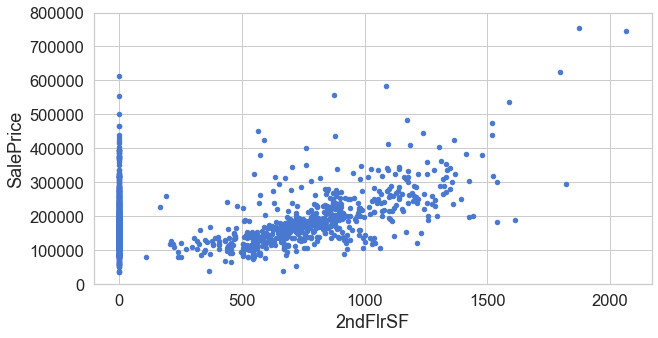

In [15]:
var = '2ndFlrSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

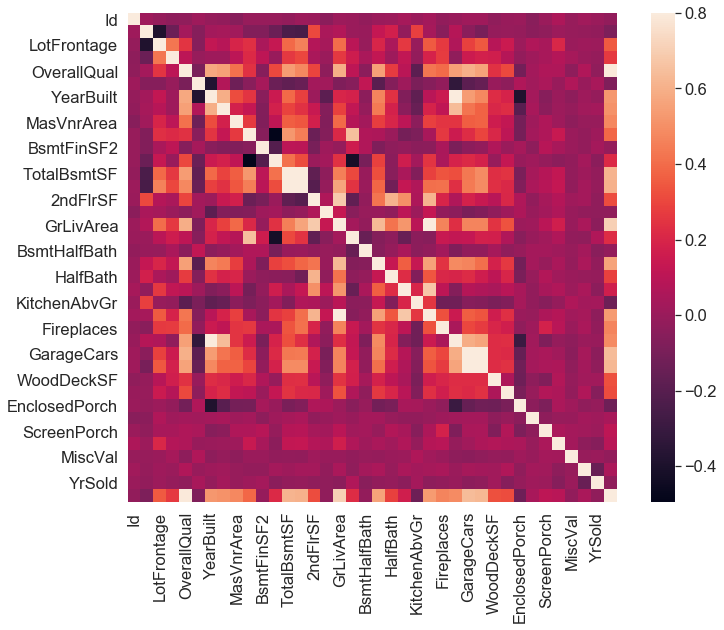

In [16]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

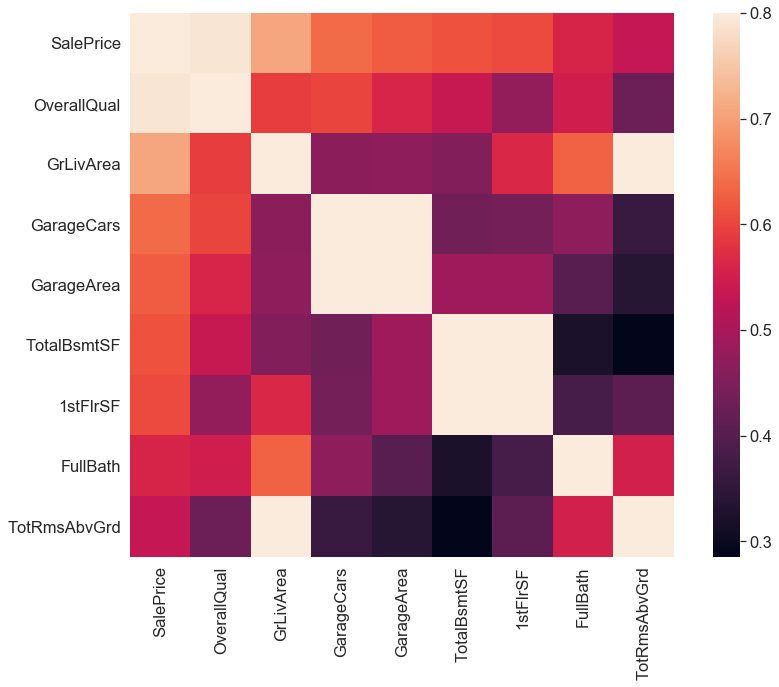

In [17]:
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_train[cols].corr(), vmax=.8, square=True);

# Selection of attributes with correlation > 30%

In [18]:
#df_train['BsmtFinSF1']

In [834]:
# creating new data set
New_data1 = df_train[['YearBuilt','2ndFlrSF','GrLivArea','FullBath','OverallQual','1stFlrSF','GarageCars','GarageArea','BedroomAbvGr','TotalBsmtSF','TotRmsAbvGrd','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','OpenPorchSF','HalfBath','LotArea','SalePrice']]

In [835]:
#New_data1

In [836]:
#New_data1.isnull().sum()

In [837]:
#New_data1['GarageYrBlt'].describe()

In [838]:
New_data1['GarageYrBlt'].fillna(New_data1['GarageYrBlt'].mean(),inplace = True)

E:\Anaconda\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [839]:
#New_data1['MasVnrArea'].describe()

In [840]:
New_data1['MasVnrArea'].fillna(New_data1['MasVnrArea'].mean(),inplace = True)

In [841]:
#New_data1.isnull().sum()

In [842]:
New_data1['LotFrontage'].fillna(New_data1['LotFrontage'].mean(),inplace = True)

In [843]:
#New_data1.isnull().sum()

In [844]:
#New_data1 = df_train[['YearBuilt','2ndFlrSF','GrLivArea','FullBath','OverallQual','1stFlrSF','GarageCars','GarageArea','BedroomAbvGr','TotalBsmtSF','TotRmsAbvGrd','YearRemodAdd','GarageYrBlt','SalePrice']]
X1 = New_data1.drop(columns=['SalePrice'])
Y1 = New_data1[['SalePrice']]
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.10, random_state=101)

# Feature Scalling

In [845]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X1_train = s_scaler.fit_transform(X1_train.astype(np.float))
X1_test = s_scaler.transform(X1_test.astype(np.float))

# Method1: Multiple Linear Regression

In [846]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X1_train, y1_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([[ 4222.07618662,  9591.64242284,  9074.73248548,  -587.37879293,
        26050.15761211, 10667.17045396,  8823.57194897,   184.15441676,
        -5944.51817505,  4916.42971309,  6703.45784044,  6499.36556062,
         1145.79084959,  5806.39417655,  3894.05077144,  6709.39149516,
          731.57807126,  3263.87931555,  1436.46386014,  -565.76044598,
         4957.70014172]])

In [847]:
y1_predd = regressor.predict(X1_test)
data1 = pd.DataFrame()
data1['Actual'] = list(y1_test['SalePrice'])
data1['Predicted'] = y1_predd
data1

,Actual,Predicted
0,255000,265538.608368
1,145000,135193.628718
2,150500,134261.729653
3,412500,371753.042140
4,402861,353266.652517
...,...,...
141,184000,188680.891091
142,95000,91113.759140
143,112500,92385.472921
144,163000,203393.185318


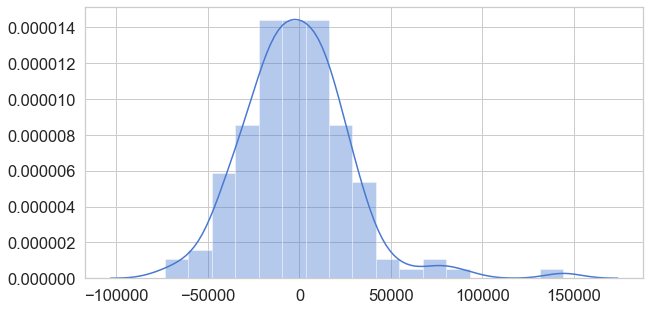

In [848]:
fig = plt.figure(figsize=(10,5))
residuals = (y1_test- y1_predd)
sns.distplot(residuals)

In [849]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y1_test, y1_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y1_test, y1_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y1_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y1_test,y1_predd)))

Mean Absolute Error: 21586.65
Mean Squared Error:848975941.36
Root Mean Squared Error:29137.19
Variance score is: 0.83


In [850]:
New_data1['SalePrice'].mean()

180921.19589041095

In [851]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X1_train,y1_train)))
print("Test Score {:.2f}".format(regressor.score(X1_test, y1_test)))

Linear Regression Model:
Train Score 0.79
Test Score 0.83


# Method2: Keras Regression

### First Model of Neural Networks

In [852]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [853]:
# having 19 nueron is based on the number of available featurs

model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
#model.add(Dense(19,activation='relu'))
#model.add(Dense(1,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [854]:
y1_train = np.array(y1_train)


In [855]:
#model.fit(X_train, y_train, epochs=500, callbacks=[keras.callbacks.EarlyStopping(patience=3)])


model.fit(x=X1_train,y=y1_train,
          validation_data=(X1_test,y1_test),
          batch_size=128,epochs=700,)

Train on 1314 samples, validate on 146 samples
Epoch 1/700
1314/1314 [==============================] - 4s 3ms/sample - loss: 39291510048.3409 - val_loss: 36769316134.5753
Epoch 2/700
1314/1314 [==============================] - 0s 31us/sample - loss: 39291456544.7306 - val_loss: 36769273603.5069
Epoch 3/700
1314/1314 [==============================] - 0s 34us/sample - loss: 39291400079.7808 - val_loss: 36769201334.3562
Epoch 4/700
1314/1314 [==============================] - 0s 39us/sample - loss: 39291303384.2557 - val_loss: 36769082241.7534
Epoch 5/700
1314/1314 [==============================] - 0s 32us/sample - loss: 39291120342.3075 - val_loss: 36768832469.9178
Epoch 6/700
1314/1314 [==============================] - 0s 43us/sample - loss: 39290739027.7747 - val_loss: 36768338368.8767
Epoch 7/700
1314/1314 [==============================] - 0s 43us/sample - loss: 39290030544.4627 - val_loss: 36767428888.5479
Epoch 8/700
1314/1314 [==============================] - 0s 41us/sample 

1314/1314 [==============================] - 0s 33us/sample - loss: 5335252637.4186 - val_loss: 4567628273.9726
Epoch 66/700
1314/1314 [==============================] - 0s 31us/sample - loss: 5246331942.1857 - val_loss: 4465114729.2055
Epoch 67/700
1314/1314 [==============================] - 0s 31us/sample - loss: 5153199770.6910 - val_loss: 4350510865.5342
Epoch 68/700
1314/1314 [==============================] - 0s 30us/sample - loss: 5065129205.4795 - val_loss: 4261878626.1918
Epoch 69/700
1314/1314 [==============================] - 0s 32us/sample - loss: 4981648545.7047 - val_loss: 4169141809.0959
Epoch 70/700
1314/1314 [==============================] - 0s 32us/sample - loss: 4900029664.0487 - val_loss: 4088478628.8219
Epoch 71/700
1314/1314 [==============================] - 0s 30us/sample - loss: 4826104185.9604 - val_loss: 4013226152.3288
Epoch 72/700
1314/1314 [==============================] - 0s 31us/sample - loss: 4736298685.3699 - val_loss: 3923449203.7260
Epoch 73/700


1314/1314 [==============================] - 0s 32us/sample - loss: 2090958239.5616 - val_loss: 1547128072.7671
Epoch 131/700
1314/1314 [==============================] - 0s 32us/sample - loss: 2075803522.7275 - val_loss: 1531529072.2192
Epoch 132/700
1314/1314 [==============================] - 0s 30us/sample - loss: 2058859454.1492 - val_loss: 1523235149.1507
Epoch 133/700
1314/1314 [==============================] - 0s 37us/sample - loss: 2043916877.5403 - val_loss: 1514836529.0959
Epoch 134/700
1314/1314 [==============================] - 0s 39us/sample - loss: 2031213320.1826 - val_loss: 1507552519.0137
Epoch 135/700
1314/1314 [==============================] - 0s 39us/sample - loss: 2013939729.1446 - val_loss: 1495254438.5753
Epoch 136/700
1314/1314 [==============================] - 0s 43us/sample - loss: 2002188429.2481 - val_loss: 1478319310.9041
Epoch 137/700
1314/1314 [==============================] - 0s 40us/sample - loss: 1988814257.2907 - val_loss: 1470968416.4384
Epoch 

Epoch 195/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1561218577.7291 - val_loss: 1218354449.5342
Epoch 196/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1558946508.5662 - val_loss: 1210140936.7671
Epoch 197/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1553833765.9909 - val_loss: 1212805965.1507
Epoch 198/700
1314/1314 [==============================] - 0s 35us/sample - loss: 1548053359.4399 - val_loss: 1212297998.0274
Epoch 199/700
1314/1314 [==============================] - 0s 33us/sample - loss: 1543590754.8737 - val_loss: 1208549526.7945
Epoch 200/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1541099784.9619 - val_loss: 1210483277.1507
Epoch 201/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1540262079.9026 - val_loss: 1197988245.0411
Epoch 202/700
1314/1314 [==============================] - 0s 31us/sample - loss: 1530926112.1948 - val_loss: 12006937

1314/1314 [==============================] - 0s 33us/sample - loss: 1345766412.4688 - val_loss: 1082779561.2055
Epoch 261/700
1314/1314 [==============================] - 0s 33us/sample - loss: 1343531995.7626 - val_loss: 1078822478.0274
Epoch 262/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1340252001.5099 - val_loss: 1077064978.8493
Epoch 263/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1339484595.3364 - val_loss: 1078191079.4521
Epoch 264/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1335796631.5738 - val_loss: 1075819953.0959
Epoch 265/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1336090219.0563 - val_loss: 1089553520.2192
Epoch 266/700
1314/1314 [==============================] - 0s 31us/sample - loss: 1335978211.5556 - val_loss: 1081960706.6301
Epoch 267/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1332467142.0396 - val_loss: 1085558903.2329
Epoch 

1314/1314 [==============================] - 0s 33us/sample - loss: 1221381971.1903 - val_loss: 1000601201.0959
Epoch 325/700
1314/1314 [==============================] - 0s 32us/sample - loss: 1220207801.9604 - val_loss: 1003764889.4247
Epoch 326/700
1314/1314 [==============================] - 0s 33us/sample - loss: 1217395312.0244 - val_loss: 1000296405.9178
Epoch 327/700
1314/1314 [==============================] - 0s 31us/sample - loss: 1217013968.3653 - val_loss: 1001366054.5753
Epoch 328/700
1314/1314 [==============================] - 0s 31us/sample - loss: 1215158284.4688 - val_loss: 998876157.3699
Epoch 329/700
1314/1314 [==============================] - 0s 33us/sample - loss: 1214957322.7154 - val_loss: 991073155.9452
Epoch 330/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1214380395.7382 - val_loss: 990981155.0685
Epoch 331/700
1314/1314 [==============================] - 0s 31us/sample - loss: 1211914152.8158 - val_loss: 993482093.5890
Epoch 332/

1314/1314 [==============================] - 0s 31us/sample - loss: 1147882365.2725 - val_loss: 962556808.7671
Epoch 390/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1147804623.6834 - val_loss: 959870561.3151
Epoch 391/700
1314/1314 [==============================] - 0s 31us/sample - loss: 1148257858.7275 - val_loss: 951632840.7671
Epoch 392/700
1314/1314 [==============================] - 0s 31us/sample - loss: 1145648554.1796 - val_loss: 949591443.9452
Epoch 393/700
1314/1314 [==============================] - 0s 34us/sample - loss: 1142890219.3486 - val_loss: 954913457.9726
Epoch 394/700
1314/1314 [==============================] - 0s 34us/sample - loss: 1143890682.9346 - val_loss: 958176956.9315
Epoch 395/700
1314/1314 [==============================] - 0s 33us/sample - loss: 1146088187.1294 - val_loss: 948201570.1918
Epoch 396/700
1314/1314 [==============================] - 0s 31us/sample - loss: 1140911329.2177 - val_loss: 951084551.8904
Epoch 397/700


1314/1314 [==============================] - 0s 31us/sample - loss: 1098012790.5510 - val_loss: 924032578.6301
Epoch 455/700
1314/1314 [==============================] - 0s 32us/sample - loss: 1096859192.1096 - val_loss: 924171818.0822
Epoch 456/700
1314/1314 [==============================] - 0s 32us/sample - loss: 1096261381.8935 - val_loss: 927772356.3836
Epoch 457/700
1314/1314 [==============================] - 0s 32us/sample - loss: 1096869008.6575 - val_loss: 928508221.3699
Epoch 458/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1096254912.0974 - val_loss: 921737524.6027
Epoch 459/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1092251681.8995 - val_loss: 932573741.5890
Epoch 460/700
1314/1314 [==============================] - 0s 31us/sample - loss: 1098109563.0807 - val_loss: 932699755.8356
Epoch 461/700
1314/1314 [==============================] - 0s 31us/sample - loss: 1101336145.7291 - val_loss: 926749390.9041
Epoch 462/700


1314/1314 [==============================] - 0s 33us/sample - loss: 1064268817.8265 - val_loss: 906653934.4658
Epoch 520/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1064393566.1979 - val_loss: 906339271.8904
Epoch 521/700
1314/1314 [==============================] - 0s 40us/sample - loss: 1063907470.0274 - val_loss: 909552164.3836
Epoch 522/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1062466007.0868 - val_loss: 906703861.4795
Epoch 523/700
1314/1314 [==============================] - 0s 29us/sample - loss: 1061316389.5038 - val_loss: 906249587.7260
Epoch 524/700
1314/1314 [==============================] - 0s 29us/sample - loss: 1060701377.1689 - val_loss: 906072805.6986
Epoch 525/700
1314/1314 [==============================] - 0s 31us/sample - loss: 1060229540.2374 - val_loss: 905749301.0411
Epoch 526/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1061354510.5145 - val_loss: 904784440.1096
Epoch 527/700


1314/1314 [==============================] - 0s 30us/sample - loss: 1056928787.0928 - val_loss: 916239395.2877
Epoch 585/700
1314/1314 [==============================] - 0s 32us/sample - loss: 1052657467.4216 - val_loss: 901215219.7260
Epoch 586/700
1314/1314 [==============================] - 0s 31us/sample - loss: 1041022512.0244 - val_loss: 897907371.8356
Epoch 587/700
1314/1314 [==============================] - 0s 31us/sample - loss: 1037283651.6043 - val_loss: 897503301.2603
Epoch 588/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1036017752.0609 - val_loss: 898764167.8904
Epoch 589/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1038016094.4901 - val_loss: 896544545.3151
Epoch 590/700
1314/1314 [==============================] - 0s 33us/sample - loss: 1036261225.7900 - val_loss: 895714251.3973
Epoch 591/700
1314/1314 [==============================] - 0s 34us/sample - loss: 1037844247.5738 - val_loss: 898313899.8356
Epoch 592/700


1314/1314 [==============================] - 0s 33us/sample - loss: 1015715397.1142 - val_loss: 895759066.7397
Epoch 650/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1014085943.7199 - val_loss: 896662038.7945
Epoch 651/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1013217330.9467 - val_loss: 902400280.1096
Epoch 652/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1017550421.1385 - val_loss: 904664649.6438
Epoch 653/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1021192126.1492 - val_loss: 899260780.2740
Epoch 654/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1014080026.5936 - val_loss: 897443790.9041
Epoch 655/700
1314/1314 [==============================] - 0s 30us/sample - loss: 1014236469.1385 - val_loss: 897218564.3836
Epoch 656/700
1314/1314 [==============================] - 0s 32us/sample - loss: 1012595638.2588 - val_loss: 897154075.6164
Epoch 657/700


In [856]:
model.summary()

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_344 (Dense)            multiple                  418       
_________________________________________________________________
dense_345 (Dense)            multiple                  380       
_________________________________________________________________
dense_346 (Dense)            multiple                  380       
_________________________________________________________________
dense_347 (Dense)            multiple                  380       
_________________________________________________________________
dense_348 (Dense)            multiple                  20        
Total params: 1,578
Trainable params: 1,578
Non-trainable params: 0
_________________________________________________________________


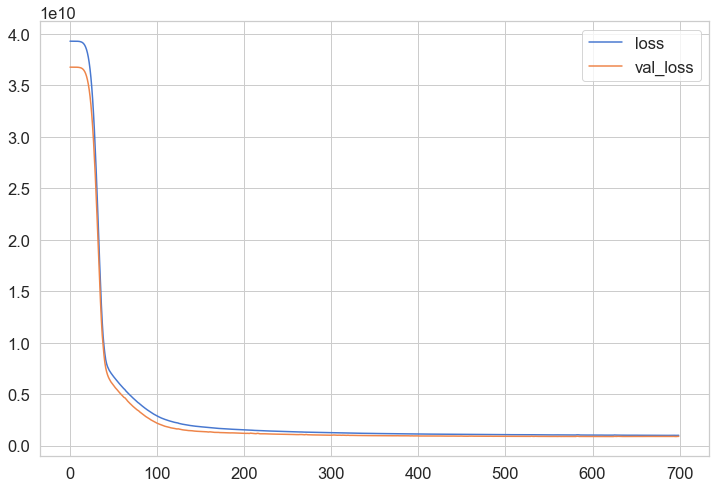

In [857]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [858]:
# Evaluation on Test Data

In [859]:
y1_pred = model.predict(X1_test)

In [860]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y1_test, y1_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y1_test, y1_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y1_test,y1_pred)))

Mean Absolute Error: 20878.70
Mean Squared Error: 903120706.71
Root Mean Squared Error: 30051.97
Variance score is: 0.82


In [861]:
New_data1['SalePrice'].mean()

180921.19589041095

In [ ]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y1_test,y1_pred)

# Perfect predictions
plt.plot(y1_test,y1_test,'r')

In [ ]:
fig = plt.figure(figsize=(10,5))
residuals = (y1_test- y1_pred)
sns.distplot(residuals)

# Multiple Linear Regression vs Keras Regression

In [ ]:
print('Model: Keras Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y1_test, y1_pred)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y1_test, y1_pred)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y1_test,y1_pred)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y1_test, y1_predd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y1_test, y1_predd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y1_predd))))
print('Score: {:.2f}'.format(metrics.explained_variance_score(y1_test,y1_predd)*100))

### 2nd Model Of Neural Network

In [808]:
# having 19 nueron is based on the number of available featurs

model2 = Sequential()
model2.add(Dense(8,activation='elu'))
model2.add(Dense(8,activation='elu'))
model2.add(Dense(8,activation='elu'))
model2.add(Dense(8,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))
#model2.add(Dense(19,activation='elu'))

model2.add(Dense(1))

model2.compile(optimizer='adam',loss='mse')

In [809]:
model2.fit(x=X1_train,y=y1_train,
          validation_data=(X1_test,y1_test),
          batch_size=128,epochs=800,)

Train on 1314 samples, validate on 146 samples
Epoch 1/800
1314/1314 [==============================] - 4s 3ms/sample - loss: 39291494188.0304 - val_loss: 36769213930.9589
Epoch 2/800
1314/1314 [==============================] - 0s 33us/sample - loss: 39291253206.6971 - val_loss: 36768979869.8082
Epoch 3/800
1314/1314 [==============================] - 0s 32us/sample - loss: 39290981246.6362 - val_loss: 36768693486.4658
Epoch 4/800
1314/1314 [==============================] - 0s 34us/sample - loss: 39290617238.7945 - val_loss: 36768303608.9863
Epoch 5/800
1314/1314 [==============================] - 0s 35us/sample - loss: 39290148558.5145 - val_loss: 36767770034.8493
Epoch 6/800
1314/1314 [==============================] - 0s 33us/sample - loss: 39289474641.8265 - val_loss: 36767035392.0000
Epoch 7/800
1314/1314 [==============================] - 0s 36us/sample - loss: 39288531564.3227 - val_loss: 36765990350.9041
Epoch 8/800
1314/1314 [==============================] - 0s 34us/sample 

1314/1314 [==============================] - 0s 30us/sample - loss: 8401220515.2633 - val_loss: 8012335496.7671
Epoch 66/800
1314/1314 [==============================] - 0s 30us/sample - loss: 8255011027.1903 - val_loss: 7870775955.2877
Epoch 67/800
1314/1314 [==============================] - 0s 29us/sample - loss: 8128307739.2755 - val_loss: 7751577887.5616
Epoch 68/800
1314/1314 [==============================] - 0s 29us/sample - loss: 8004361836.3227 - val_loss: 7636708401.0959
Epoch 69/800
1314/1314 [==============================] - 0s 30us/sample - loss: 7896028722.6545 - val_loss: 7531164447.5616
Epoch 70/800
1314/1314 [==============================] - 0s 29us/sample - loss: 7795057332.0183 - val_loss: 7436109781.9178
Epoch 71/800
1314/1314 [==============================] - 0s 31us/sample - loss: 7717387850.0335 - val_loss: 7354270523.6164
Epoch 72/800
1314/1314 [==============================] - 0s 31us/sample - loss: 7643823468.7123 - val_loss: 7268395919.7808
Epoch 73/800


1314/1314 [==============================] - 0s 31us/sample - loss: 6009793772.1279 - val_loss: 5618111754.5205
Epoch 131/800
1314/1314 [==============================] - 0s 31us/sample - loss: 5995572085.2846 - val_loss: 5593474279.4521
Epoch 132/800
1314/1314 [==============================] - 0s 31us/sample - loss: 5972502310.5753 - val_loss: 5597658595.9452
Epoch 133/800
1314/1314 [==============================] - 0s 31us/sample - loss: 5963504576.0974 - val_loss: 5577102574.4658
Epoch 134/800
1314/1314 [==============================] - 0s 34us/sample - loss: 5947546167.3303 - val_loss: 5551206179.0685
Epoch 135/800
1314/1314 [==============================] - 0s 33us/sample - loss: 5928301894.5266 - val_loss: 5528316387.9452
Epoch 136/800
1314/1314 [==============================] - 0s 30us/sample - loss: 5912901247.4155 - val_loss: 5506519054.0274
Epoch 137/800
1314/1314 [==============================] - 0s 30us/sample - loss: 5899375365.8447 - val_loss: 5486186040.1096
Epoch 

1314/1314 [==============================] - 0s 32us/sample - loss: 5278773480.2314 - val_loss: 4805744850.4110
Epoch 196/800
1314/1314 [==============================] - 0s 32us/sample - loss: 5272403272.8645 - val_loss: 4801394838.7945
Epoch 197/800
1314/1314 [==============================] - 0s 31us/sample - loss: 5263128022.6971 - val_loss: 4789612344.1096
Epoch 198/800
1314/1314 [==============================] - 0s 30us/sample - loss: 5254665529.2785 - val_loss: 4781650242.6301
Epoch 199/800
1314/1314 [==============================] - 0s 31us/sample - loss: 5248227761.2907 - val_loss: 4771331492.8219
Epoch 200/800
1314/1314 [==============================] - 0s 31us/sample - loss: 5240481036.8584 - val_loss: 4768502145.7534
Epoch 201/800
1314/1314 [==============================] - 0s 30us/sample - loss: 5234216267.9817 - val_loss: 4767551144.3288
Epoch 202/800
1314/1314 [==============================] - 0s 33us/sample - loss: 5227921858.4353 - val_loss: 4753862403.5068
Epoch 

1314/1314 [==============================] - 0s 32us/sample - loss: 4793813584.2679 - val_loss: 4399350173.8082
Epoch 261/800
1314/1314 [==============================] - 0s 32us/sample - loss: 4781663202.3866 - val_loss: 4395338496.0000
Epoch 262/800
1314/1314 [==============================] - 0s 31us/sample - loss: 4777925680.3166 - val_loss: 4386296761.8630
Epoch 263/800
1314/1314 [==============================] - 0s 31us/sample - loss: 4772064632.4018 - val_loss: 4391122887.8904
Epoch 264/800
1314/1314 [==============================] - 0s 30us/sample - loss: 4762766878.3927 - val_loss: 4390758280.7671
Epoch 265/800
1314/1314 [==============================] - 0s 32us/sample - loss: 4753642937.8630 - val_loss: 4380132103.0137
Epoch 266/800
1314/1314 [==============================] - 0s 32us/sample - loss: 4745918728.9619 - val_loss: 4370198710.3562
Epoch 267/800
1314/1314 [==============================] - 0s 28us/sample - loss: 4738221566.4414 - val_loss: 4365885943.2329
Epoch 

1314/1314 [==============================] - 0s 31us/sample - loss: 4407723068.0061 - val_loss: 4209298533.6986
Epoch 326/800
1314/1314 [==============================] - 0s 33us/sample - loss: 4400524830.3927 - val_loss: 4200342163.2877
Epoch 327/800
1314/1314 [==============================] - 0s 30us/sample - loss: 4396384090.7884 - val_loss: 4192850986.0822
Epoch 328/800
1314/1314 [==============================] - 0s 30us/sample - loss: 4392243384.3044 - val_loss: 4183409411.5068
Epoch 329/800
1314/1314 [==============================] - 0s 31us/sample - loss: 4388890712.8402 - val_loss: 4178437940.6027
Epoch 330/800
1314/1314 [==============================] - 0s 30us/sample - loss: 4383648121.1811 - val_loss: 4174773998.4658
Epoch 331/800
1314/1314 [==============================] - 0s 34us/sample - loss: 4372008545.4125 - val_loss: 4189559818.5205
Epoch 332/800
1314/1314 [==============================] - 0s 31us/sample - loss: 4367741084.6393 - val_loss: 4186199544.9863
Epoch 

1314/1314 [==============================] - 0s 30us/sample - loss: 3990718561.8021 - val_loss: 3684108205.5890
Epoch 391/800
1314/1314 [==============================] - 0s 31us/sample - loss: 3986594424.7915 - val_loss: 3678709567.1233
Epoch 392/800
1314/1314 [==============================] - 0s 28us/sample - loss: 3981359827.9696 - val_loss: 3662406136.9863
Epoch 393/800
1314/1314 [==============================] - 0s 30us/sample - loss: 3973957839.2938 - val_loss: 3657624425.2055
Epoch 394/800
1314/1314 [==============================] - 0s 30us/sample - loss: 3966173073.3394 - val_loss: 3640438685.8082
Epoch 395/800
1314/1314 [==============================] - 0s 29us/sample - loss: 3958198418.1187 - val_loss: 3630462190.4658
Epoch 396/800
1314/1314 [==============================] - 0s 32us/sample - loss: 3948088204.6636 - val_loss: 3622920570.7397
Epoch 397/800
1314/1314 [==============================] - 0s 32us/sample - loss: 3940746715.3729 - val_loss: 3617669295.3425
Epoch 

1314/1314 [==============================] - 0s 31us/sample - loss: 3564650159.3425 - val_loss: 3174764547.5068
Epoch 456/800
1314/1314 [==============================] - 0s 30us/sample - loss: 3554119459.4581 - val_loss: 3170806720.8767
Epoch 457/800
1314/1314 [==============================] - 0s 31us/sample - loss: 3548529282.1431 - val_loss: 3159163802.3014
Epoch 458/800
1314/1314 [==============================] - 0s 30us/sample - loss: 3539987816.8158 - val_loss: 3145175667.7260
Epoch 459/800
1314/1314 [==============================] - 0s 31us/sample - loss: 3532767107.3120 - val_loss: 3132162735.3425
Epoch 460/800
1314/1314 [==============================] - 0s 30us/sample - loss: 3525840142.4170 - val_loss: 3118834449.5342
Epoch 461/800
1314/1314 [==============================] - 0s 31us/sample - loss: 3520520893.7595 - val_loss: 3107706087.4521
Epoch 462/800
1314/1314 [==============================] - 0s 32us/sample - loss: 3512685401.2298 - val_loss: 3095891056.2192
Epoch 

Epoch 520/800
1314/1314 [==============================] - 0s 33us/sample - loss: 2943911122.8006 - val_loss: 2627158819.0685
Epoch 521/800
1314/1314 [==============================] - 0s 29us/sample - loss: 2935132295.9878 - val_loss: 2616964099.5068
Epoch 522/800
1314/1314 [==============================] - 0s 37us/sample - loss: 2915194551.5251 - val_loss: 2598332521.2055
Epoch 523/800
1314/1314 [==============================] - 0s 37us/sample - loss: 2887167636.8463 - val_loss: 2584423231.1233
Epoch 524/800
1314/1314 [==============================] - 0s 37us/sample - loss: 2858424885.3820 - val_loss: 2563033287.8904
Epoch 525/800
1314/1314 [==============================] - 0s 33us/sample - loss: 2833037548.5175 - val_loss: 2534149212.9315
Epoch 526/800
1314/1314 [==============================] - 0s 31us/sample - loss: 2803897269.9665 - val_loss: 2485829856.4384
Epoch 527/800
1314/1314 [==============================] - 0s 31us/sample - loss: 2755943606.3562 - val_loss: 24221788

1314/1314 [==============================] - 0s 34us/sample - loss: 1520515779.2146 - val_loss: 1325823084.7123
Epoch 586/800
1314/1314 [==============================] - 0s 32us/sample - loss: 1512567722.0822 - val_loss: 1313890170.7397
Epoch 587/800
1314/1314 [==============================] - 0s 33us/sample - loss: 1513655832.9376 - val_loss: 1323891211.3973
Epoch 588/800
1314/1314 [==============================] - 0s 35us/sample - loss: 1499773560.9863 - val_loss: 1316087253.9178
Epoch 589/800
1314/1314 [==============================] - 0s 30us/sample - loss: 1494206872.7428 - val_loss: 1312534427.1781
Epoch 590/800
1314/1314 [==============================] - 0s 35us/sample - loss: 1491257178.7884 - val_loss: 1318659478.7945
Epoch 591/800
1314/1314 [==============================] - 0s 31us/sample - loss: 1488483412.5540 - val_loss: 1312657656.9863
Epoch 592/800
1314/1314 [==============================] - 0s 31us/sample - loss: 1491073642.2770 - val_loss: 1308039220.6027
Epoch 

1314/1314 [==============================] - 0s 32us/sample - loss: 1299351832.3531 - val_loss: 1161132251.1781
Epoch 651/800
1314/1314 [==============================] - 0s 31us/sample - loss: 1296930451.4825 - val_loss: 1157538048.0000
Epoch 652/800
1314/1314 [==============================] - 0s 33us/sample - loss: 1295176667.1781 - val_loss: 1156273102.0274
Epoch 653/800
1314/1314 [==============================] - 0s 31us/sample - loss: 1293094278.6240 - val_loss: 1157564456.3288
Epoch 654/800
1314/1314 [==============================] - 0s 29us/sample - loss: 1293725003.0076 - val_loss: 1151706222.4658
Epoch 655/800
1314/1314 [==============================] - 0s 34us/sample - loss: 1283278508.2253 - val_loss: 1149219538.4110
Epoch 656/800
1314/1314 [==============================] - 0s 31us/sample - loss: 1282467001.1811 - val_loss: 1146042989.1507
Epoch 657/800
1314/1314 [==============================] - 0s 31us/sample - loss: 1283621304.0122 - val_loss: 1146063100.4932
Epoch 

1314/1314 [==============================] - 0s 34us/sample - loss: 1149389874.6545 - val_loss: 1061974461.8082
Epoch 716/800
1314/1314 [==============================] - 0s 31us/sample - loss: 1148707911.3059 - val_loss: 1061118440.3288
Epoch 717/800
1314/1314 [==============================] - 0s 32us/sample - loss: 1147484054.3075 - val_loss: 1060237467.1781
Epoch 718/800
1314/1314 [==============================] - 0s 31us/sample - loss: 1147276987.0320 - val_loss: 1057564580.8219
Epoch 719/800
1314/1314 [==============================] - 0s 30us/sample - loss: 1138182255.2451 - val_loss: 1061427740.0548
Epoch 720/800
1314/1314 [==============================] - 0s 30us/sample - loss: 1145576025.5221 - val_loss: 1059880490.0822
Epoch 721/800
1314/1314 [==============================] - 0s 31us/sample - loss: 1141250144.2435 - val_loss: 1057493166.4658
Epoch 722/800
1314/1314 [==============================] - 0s 31us/sample - loss: 1138929826.1918 - val_loss: 1055883036.9315
Epoch 

1314/1314 [==============================] - 0s 32us/sample - loss: 1047134872.7428 - val_loss: 973118565.6986
Epoch 781/800
1314/1314 [==============================] - 0s 33us/sample - loss: 1044926964.3105 - val_loss: 971631869.3699
Epoch 782/800
1314/1314 [==============================] - 0s 31us/sample - loss: 1045111987.1416 - val_loss: 971065258.0822
Epoch 783/800
1314/1314 [==============================] - 0s 31us/sample - loss: 1048365010.0213 - val_loss: 971119566.9041
Epoch 784/800
1314/1314 [==============================] - 0s 29us/sample - loss: 1043872038.5753 - val_loss: 962410830.9041
Epoch 785/800
1314/1314 [==============================] - 0s 33us/sample - loss: 1043252594.4597 - val_loss: 960137447.4521
Epoch 786/800
1314/1314 [==============================] - 0s 41us/sample - loss: 1040282290.4597 - val_loss: 958973258.0822
Epoch 787/800
1314/1314 [==============================] - ETA: 0s - loss: 564993856.000 - 0s 38us/sample - loss: 1040312852.4566 - val_los

In [810]:
model2.summary()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_329 (Dense)            multiple                  418       
_________________________________________________________________
dense_330 (Dense)            multiple                  380       
_________________________________________________________________
dense_331 (Dense)            multiple                  380       
_________________________________________________________________
dense_332 (Dense)            multiple                  380       
_________________________________________________________________
dense_333 (Dense)            multiple                  20        
Total params: 1,578
Trainable params: 1,578
Non-trainable params: 0
_________________________________________________________________


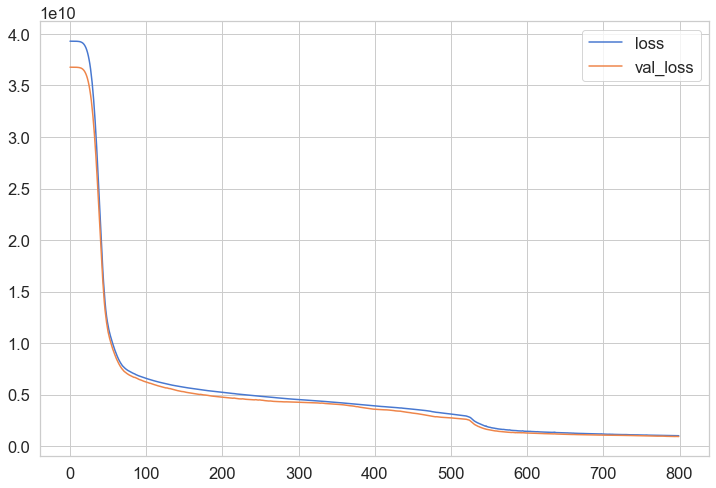

In [811]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.plot(figsize=(12,8))

In [812]:
y1_predict = model2.predict(X1_test)

In [813]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y1_test, y1_predict)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y1_test, y1_predict)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y1_predict))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y1_test,y1_predict)))

Mean Absolute Error: 22543.39
Mean Squared Error: 942158272.62
Root Mean Squared Error: 30694.60
Variance score is: 0.82


### 3rd Model of Neural Network

In [56]:
# having 19 nueron is based on the number of available featurs

model3 = Sequential()

model3.add(Dense(9,activation='selu'))
model3.add(Dense(9,activation='selu'))
model3.add(Dense(9,activation='selu'))
model3.add(Dense(9,activation='selu'))
model3.add(Dense(9,activation='selu'))
model3.add(Dense(9,activation='selu'))
model3.add(Dense(9,activation='selu'))
model3.add(Dense(9,activation='selu'))
model3.add(Dense(9,activation='selu'))
model3.add(Dense(1))

model3.compile(optimizer='adam',loss='mse')

In [57]:
model3.fit(x=X1_train,y=y1_train,
          validation_data=(X1_test,y1_test),
          batch_size=128,epochs=300,)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1314 samples, validate on 146 samples
Epoch 1/300
1314/1314 [==============================] - 1s 714us/sample - loss: 39291214924.3714 - val_loss: 36768755431.4521
Epoch 2/300
1314/1314 [==============================] - 0s 26us/sample - loss: 39290653921.9970 - val_loss: 36768231620.3836
Epoch 3/300
1314/1314 [==============================] - 0s 26us/sample - loss: 39290104453.2603 - val_loss: 36767648782.0274
Epoch 4/300
1314/1314 [==============================] - 0s 27us/sample - loss: 39289435851.3973 - val_loss: 36766916551.8904
Epoch 5/300
1314/1314 [==============================] - 0s 28us/sample - loss: 39288637006.7093 - val_loss: 36766071373.1507
Epoch 6/300
1314/1314 [==============================] - 0s 25us/sample - loss: 39287723467.7869 - val_loss: 36765049112.5479
Epoch 7/300
1314/1314 [==============================] - 0s 27us/sample - loss: 39286602030.3683 - val

1314/1314 [==============================] - 0s 21us/sample - loss: 3254578804.5053 - val_loss: 3379452717.5890
Epoch 64/300
1314/1314 [==============================] - 0s 23us/sample - loss: 3214277371.3242 - val_loss: 3335856836.3836
Epoch 65/300
1314/1314 [==============================] - 0s 21us/sample - loss: 3176156787.7260 - val_loss: 3304200437.4795
Epoch 66/300
1314/1314 [==============================] - 0s 21us/sample - loss: 3147396056.2557 - val_loss: 3272701313.7534
Epoch 67/300
1314/1314 [==============================] - 0s 22us/sample - loss: 3113051639.0381 - val_loss: 3240046858.5205
Epoch 68/300
1314/1314 [==============================] - 0s 21us/sample - loss: 3079194300.9802 - val_loss: 3209921693.8082
Epoch 69/300
1314/1314 [==============================] - 0s 21us/sample - loss: 3048000514.7275 - val_loss: 3173470718.2466
Epoch 70/300
1314/1314 [==============================] - 0s 21us/sample - loss: 3016032234.1796 - val_loss: 3141051995.1781
Epoch 71/300


1314/1314 [==============================] - 0s 21us/sample - loss: 1787248811.6408 - val_loss: 1896745717.4795
Epoch 129/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1780595976.7671 - val_loss: 1901404366.9041
Epoch 130/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1773631891.4825 - val_loss: 1881532419.5068
Epoch 131/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1770046688.0487 - val_loss: 1915691696.6575
Epoch 132/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1760796592.5114 - val_loss: 1917165866.0822
Epoch 133/300
1314/1314 [==============================] - 0s 22us/sample - loss: 1757767823.1963 - val_loss: 1923718487.6712
Epoch 134/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1755030039.3790 - val_loss: 1899718587.6164
Epoch 135/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1754006054.7702 - val_loss: 1875689927.8904
Epoch 

1314/1314 [==============================] - 0s 21us/sample - loss: 1549797945.2785 - val_loss: 1708562249.6438
Epoch 194/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1548305474.6301 - val_loss: 1715173305.8630
Epoch 195/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1549426867.7260 - val_loss: 1719358793.6438
Epoch 196/300
1314/1314 [==============================] - 0s 22us/sample - loss: 1543298408.0365 - val_loss: 1713343144.3288
Epoch 197/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1543423188.5540 - val_loss: 1722056830.2466
Epoch 198/300
1314/1314 [==============================] - 0s 20us/sample - loss: 1549419929.7169 - val_loss: 1730445068.2740
Epoch 199/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1540379552.1461 - val_loss: 1716902322.8493
Epoch 200/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1537240697.5708 - val_loss: 1702381070.0274
Epoch 

1314/1314 [==============================] - 0s 21us/sample - loss: 1453370683.2268 - val_loss: 1636091462.1370
Epoch 258/300
1314/1314 [==============================] - 0s 22us/sample - loss: 1458565473.4125 - val_loss: 1629810752.8767
Epoch 259/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1461542296.7428 - val_loss: 1593482027.8356
Epoch 260/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1446808790.7945 - val_loss: 1599371837.3699
Epoch 261/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1453742615.3790 - val_loss: 1628979038.6849
Epoch 262/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1446482841.3272 - val_loss: 1612672984.5479
Epoch 263/300
1314/1314 [==============================] - 0s 20us/sample - loss: 1444225266.4597 - val_loss: 1641054362.3014
Epoch 264/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1448417207.5251 - val_loss: 1648800851.2877
Epoch 

In [58]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             multiple                  198       
_________________________________________________________________
dense_25 (Dense)             multiple                  90        
_________________________________________________________________
dense_26 (Dense)             multiple                  90        
_________________________________________________________________
dense_27 (Dense)             multiple                  90        
_________________________________________________________________
dense_28 (Dense)             multiple                  90        
_________________________________________________________________
dense_29 (Dense)             multiple                  90        
_________________________________________________________________
dense_30 (Dense)             multiple                 

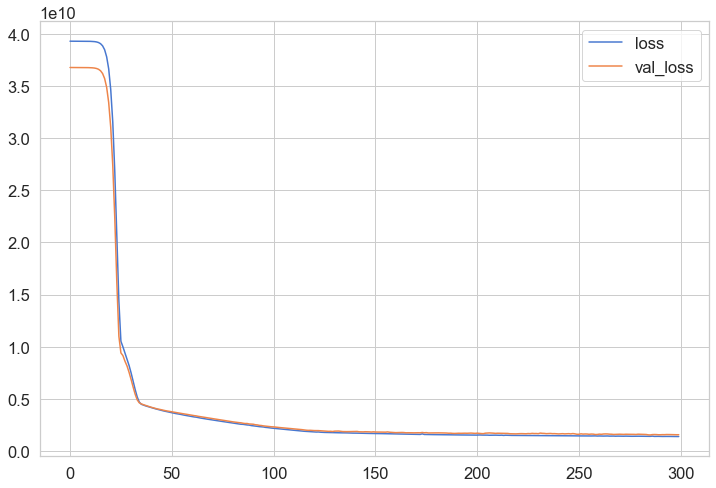

In [59]:
loss_df = pd.DataFrame(model3.history.history)
loss_df.plot(figsize=(12,8))

In [60]:
y3_predict = model3.predict(X1_test)

In [61]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y1_test, y3_predict)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y1_test, y3_predict)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y3_predict))))
print('Variance Score is: {:.2f}'.format(metrics.explained_variance_score(y1_test,y3_predict)))

Mean Absolute Error: 25198.97
Mean Squared Error: 1573402859.76
Root Mean Squared Error: 39666.14
Variance Score is: 0.70


## 4th Model Neural Network

In [62]:
model4 = Sequential()

model4.add(Dense(5,activation='selu'))
model4.add(Dense(6,activation='elu'))
model4.add(Dense(7,activation='relu'))
model4.add(Dense(8,activation='elu'))
model4.add(Dense(10,activation='relu'))
model4.add(Dense(9,activation='selu'))
model4.add(Dense(12,activation='elu'))
model4.add(Dense(11,activation='relu'))
model4.add(Dense(14,activation='selu'))
model4.add(Dense(7,activation='selu'))
model4.add(Dense(9,activation='elu'))

model4.add(Dense(1))

model4.compile(optimizer='adam',loss='mse')

In [63]:
model4.fit(x=X1_train,y=y1_train,
          validation_data=(X1_test,y1_test),
          batch_size=128,epochs=300,)

Train on 1314 samples, validate on 146 samples
Epoch 1/300
1314/1314 [==============================] - 1s 634us/sample - loss: 39291356482.6301 - val_loss: 36769056739.9452
Epoch 2/300
1314/1314 [==============================] - 0s 23us/sample - loss: 39291139662.7093 - val_loss: 36768894527.1233
Epoch 3/300
1314/1314 [==============================] - 0s 27us/sample - loss: 39290985193.0107 - val_loss: 36768745892.8219
Epoch 4/300
1314/1314 [==============================] - 0s 25us/sample - loss: 39290824033.8021 - val_loss: 36768582726.1370
Epoch 5/300
1314/1314 [==============================] - 0s 26us/sample - loss: 39290646163.2877 - val_loss: 36768391729.0959
Epoch 6/300
1314/1314 [==============================] - 0s 28us/sample - loss: 39290433018.5449 - val_loss: 36768153571.9452
Epoch 7/300
1314/1314 [==============================] - 0s 30us/sample - loss: 39290176441.8630 - val_loss: 36767878550.7945
Epoch 8/300
1314/1314 [==============================] - 0s 25us/sampl

Epoch 66/300
1314/1314 [==============================] - 0s 21us/sample - loss: 3001247799.7199 - val_loss: 2786841540.3836
Epoch 67/300
1314/1314 [==============================] - 0s 19us/sample - loss: 2964070075.0320 - val_loss: 2762814884.8219
Epoch 68/300
1314/1314 [==============================] - 0s 23us/sample - loss: 2935001606.4292 - val_loss: 2745106396.9315
Epoch 69/300
1314/1314 [==============================] - 0s 19us/sample - loss: 2894383231.4155 - val_loss: 2689224100.8219
Epoch 70/300
1314/1314 [==============================] - 0s 19us/sample - loss: 2872360096.5358 - val_loss: 2655746959.7808
Epoch 71/300
1314/1314 [==============================] - 0s 21us/sample - loss: 2834740910.5632 - val_loss: 2633260102.1370
Epoch 72/300
1314/1314 [==============================] - 0s 20us/sample - loss: 2804275712.9741 - val_loss: 2601787009.7534
Epoch 73/300
1314/1314 [==============================] - 0s 20us/sample - loss: 2770504115.2390 - val_loss: 2564464738.1918


1314/1314 [==============================] - 0s 21us/sample - loss: 1257404983.7199 - val_loss: 857681024.8767
Epoch 132/300
1314/1314 [==============================] - 0s 22us/sample - loss: 1263720190.6362 - val_loss: 847504888.9863
Epoch 133/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1249803895.2329 - val_loss: 838085572.3836
Epoch 134/300
1314/1314 [==============================] - 0s 23us/sample - loss: 1251105653.6743 - val_loss: 843602458.3014
Epoch 135/300
1314/1314 [==============================] - 0s 23us/sample - loss: 1246084468.0183 - val_loss: 832342263.2329
Epoch 136/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1232572257.4125 - val_loss: 829169470.2466
Epoch 137/300
1314/1314 [==============================] - 0s 23us/sample - loss: 1239848812.9072 - val_loss: 825726125.5890
Epoch 138/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1227425765.3090 - val_loss: 814323179.8356
Epoch 139/300


1314/1314 [==============================] - 0s 21us/sample - loss: 1085311181.8326 - val_loss: 706811641.4247
Epoch 197/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1087355613.1263 - val_loss: 697123790.4658
Epoch 198/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1080106733.3455 - val_loss: 710521687.6712
Epoch 199/300
1314/1314 [==============================] - 0s 20us/sample - loss: 1081879942.6240 - val_loss: 696186652.9315
Epoch 200/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1076485146.1065 - val_loss: 696103460.8219
Epoch 201/300
1314/1314 [==============================] - 0s 22us/sample - loss: 1073436060.8341 - val_loss: 692965297.5342
Epoch 202/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1077368405.2359 - val_loss: 696266990.4658
Epoch 203/300
1314/1314 [==============================] - 0s 21us/sample - loss: 1070919839.7565 - val_loss: 695261365.4795
Epoch 204/300


1314/1314 [==============================] - 0s 21us/sample - loss: 945569555.8234 - val_loss: 685363557.2603
Epoch 262/300
1314/1314 [==============================] - 0s 23us/sample - loss: 943959619.6043 - val_loss: 687754593.3151
Epoch 263/300
1314/1314 [==============================] - 0s 21us/sample - loss: 935761950.6849 - val_loss: 685176856.5479
Epoch 264/300
1314/1314 [==============================] - 0s 21us/sample - loss: 936663543.3303 - val_loss: 685231996.4932
Epoch 265/300
1314/1314 [==============================] - 0s 22us/sample - loss: 935375947.3973 - val_loss: 688099226.3014
Epoch 266/300
1314/1314 [==============================] - 0s 21us/sample - loss: 934181112.9863 - val_loss: 687845379.5068
Epoch 267/300
1314/1314 [==============================] - 0s 21us/sample - loss: 926527480.1096 - val_loss: 688710300.9315
Epoch 268/300
1314/1314 [==============================] - 0s 23us/sample - loss: 927677974.5997 - val_loss: 687422017.7534
Epoch 269/300
1314/131

In [64]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             multiple                  110       
_________________________________________________________________
dense_35 (Dense)             multiple                  36        
_________________________________________________________________
dense_36 (Dense)             multiple                  49        
_________________________________________________________________
dense_37 (Dense)             multiple                  64        
_________________________________________________________________
dense_38 (Dense)             multiple                  90        
_________________________________________________________________
dense_39 (Dense)             multiple                  99        
_________________________________________________________________
dense_40 (Dense)             multiple                 

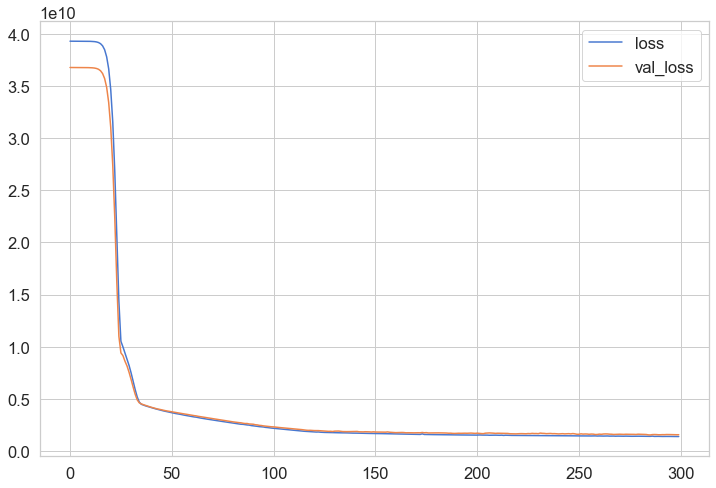

In [65]:
loss_df = pd.DataFrame(model3.history.history)
loss_df.plot(figsize=(12,8))

In [66]:
y4_predict = model4.predict(X1_test)

In [67]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y1_test, y4_predict)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y1_test, y4_predict)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y1_test, y4_predict))))
print('Score is: {:.2f}'.format(metrics.explained_variance_score(y1_test,y4_predict)))

Mean Absolute Error: 18896.02
Mean Squared Error: 688408709.99
Root Mean Squared Error: 26237.54
Score is: 0.86


# Selection of attributes with correlation  >50%

In [ ]:
#df_train['YearRemodAdd']

In [ ]:
#SalePrice        1.000000
#OverallQual      0.790982
#GrLivArea        0.708624
#GarageCars       0.640409
#GarageArea       0.623431
#TotalBsmtSF      0.613581
#1stFlrSF         0.605852
#FullBath         0.560664
#TotRmsAbvGrd     0.533723
#YearBuilt        0.522897
#YearRemodAdd     0.507101

In [ ]:
New_data = df_train[['YearBuilt','2ndFlrSF','GrLivArea','FullBath','OverallQual','1stFlrSF','GarageCars','GarageArea','BedroomAbvGr','TotalBsmtSF','TotRmsAbvGrd','YearRemodAdd','SalePrice']]
X = New_data.drop(columns=['SalePrice'])
Y = New_data[['SalePrice']]


#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=101)

In [ ]:
#New_data.isnull().sum()

# Feature Scalling

In [ ]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

# Method1: Multiple Linear Regression

In [ ]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

In [ ]:
y_predd = regressor.predict(X_test)
data = pd.DataFrame()
data['Actual'] = list(y_test['SalePrice'])
data['Predicted'] = y_predd
data

In [ ]:
# y_predd = regressor.predict(X_test)
# df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
# df1 = df.head(10)
# df1
#data['Predicted'] = y_predd

In [ ]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_predd)
sns.distplot(residuals)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)))

In [ ]:
New_data['SalePrice'].mean()

In [ ]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test, y_test)))

# Method2: Keras Regression

In [ ]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
# having 19 nueron is based on the number of available featurs

model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

# Training the Model

In [ ]:
y_train = np.array(y_train)


In [ ]:
#model.fit(X_train, y_train, epochs=500, callbacks=[keras.callbacks.EarlyStopping(patience=3)])


model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=550,)

In [ ]:
model.summary()

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

# Evaluation on Test Data

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

In [ ]:
New_data['SalePrice'].mean()

In [ ]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [ ]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

# Multiple Linear Regression vs Keras Regression

In [ ]:
print('Model: Keras Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_test,y_pred)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)*100))

# 2nd Neural Network Model

In [ ]:
# having 19 nueron is based on the number of available featurs

model5 = Sequential()

model5.add(Dense(10,activation='elu'))
model5.add(Dense(10,activation='elu'))
model5.add(Dense(10,activation='elu'))
model5.add(Dense(10,activation='elu'))
model5.add(Dense(10,activation='elu'))
model5.add(Dense(10,activation='elu'))
model5.add(Dense(11,activation='elu'))
model5.add(Dense(12,activation='elu'))
model5.add(Dense(12,activation='elu'))

model5.add(Dense(1))

model5.compile(optimizer='adam',loss='mse')

In [ ]:
model5.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=550)

In [ ]:
model5.summary()

In [ ]:
loss_df = pd.DataFrame(model5.history.history)
loss_df.plot(figsize=(12,8))

In [ ]:
y_prediction = model5.predict(X_test)

In [ ]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_prediction)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_prediction)))

# Linear Regression by using keras

In [ ]:
from tensorflow.keras import Sequential
from tensorflow import keras

In [ ]:
from tensorflow import keras

In [ ]:
squareFeet = df_train[['GrLivArea']].values #x value
salePrice = df_train[['SalePrice']].values #y value

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_shape=(1,)))
model.compile(keras.optimizers.Adam(lr=1), 'mean_squared_error')

model.fit(squareFeet,salePrice, epochs=50, batch_size=10)

In [ ]:
#Plot datapoints
df_train.plot(kind='scatter',
       x='GrLivArea',
       y='SalePrice', title='Housing Prices and Square Footage of Iowa Homes')


y_prediction = model.predict(squareFeet) #The predicted housing price based on square feet

#Plot the linear regression line
plt.plot(squareFeet, y_prediction, color='red')

In [ ]:
newSF = 2000
print(model.predict([newSF]))

# Neural Networks Model

In [ ]:
#df_train

In [ ]:
#df_train['OverallQual']

In [ ]:
#df_train['GarageCars']

In [ ]:
#df_train['SalePrice']


df2=df_train[['YearBuilt','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','YrSold','SalePrice']]

In [ ]:
#df2

In [ ]:
X = df2.drop(columns=['SalePrice'])
Y = df2[['SalePrice']]

In [ ]:
model6 = keras.models.Sequential()

model6.add(keras.layers.Dense(18, activation='relu', input_shape=(8,)))
model6.add(keras.layers.Dense(18, activation='relu'))
model6.add(keras.layers.Dense(18, activation='relu'))
model6.add(keras.layers.Dense(18, activation='relu'))
model6.add(keras.layers.Dense(18, activation='relu'))
model6.add(keras.layers.Dense(18, activation='relu'))
model6.add(keras.layers.Dense(18, activation='relu'))
model6.add(keras.layers.Dense(1))

model6.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model6.fit(X, Y, epochs=30, callbacks=[keras.callbacks.EarlyStopping(patience=3)])

#model6.fit(x=X_train,y=y_train,
#          validation_data=(X_test,y_test),
#          batch_size=128,epochs=400)

In [ ]:
test_data = np.array([2003,854,1710,2,1,3,8,2008])

print(model6.predict(test_data.reshape(1,8), batch_size=1))